In [2]:
import tensorflow as tf
from tensorflow import keras 
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

# origin.npz

In [27]:

# origin
# dataset = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_horizon.npz', allow_pickle=True)
# # horizontal
# dataset = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_origin.npz', allow_pickle=True)
# vertical
# dataset = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_vertical.npz', allow_pickle=True)
# # test
dataset = np.load('/Users/mac/Dev/Project/ThermalCamera/Model/Custom/model/npz/dataset2_vh.npz', allow_pickle=True)

origin_images, target_images, number_labels, coordinates = dataset['images'], dataset['filters'], dataset['numbers'],  dataset['coordinates']


print(origin_images.shape)
print(target_images.shape)
print(number_labels.shape)
print(coordinates.shape)


(1116, 24, 32)
(1116, 24, 32)
(1116,)
(1116, 4, 8)


In [28]:
origin_images = origin_images.reshape(1116, 24, 32, 1)
target_images = target_images.reshape(1116, 24, 32, 1)
print(origin_images.shape)
print(target_images.shape)

(1116, 24, 32, 1)
(1116, 24, 32, 1)


In [29]:
print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

origin_images = origin_images / origin_images.max()
target_images = target_images / target_images.max()

print(origin_images.max(), origin_images.min())
print(target_images.max(), target_images.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [30]:
def normalize_coordinates(coords, width=32, height=24):
    # Check the shape of the input coordinates
    if coords.shape[-1] != 8:
        raise ValueError("The last dimension of the input coordinates should be 8.")

    # Create a normalization array
    normalization_factors = np.array([width, height, width, height, width, height, width, height])

    # Normalize the coordinates
    normalized_coords = coords / normalization_factors

    return normalized_coords


In [31]:
norm_location = normalize_coordinates(coordinates)
print(norm_location.shape)

from keras.utils import to_categorical

trian_labels = to_categorical(number_labels, num_classes=5)

(1116, 4, 8)


In [32]:
print(trian_labels.shape)

(1116, 5)


(5, 48, 32, 1)


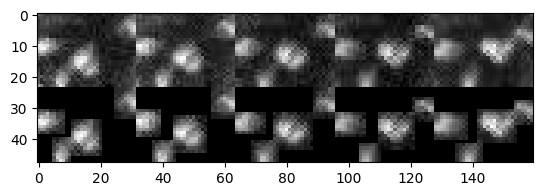

[4 4 4 4 4]


In [33]:
imgs = np.concatenate([origin_images[1000:1005], target_images[1000:1005]], axis = 1)
print(imgs.shape)

plt.imshow(imgs.transpose(1, 0, 2, 3).reshape(48, -1, 1), cmap = 'gray')
plt.show()
print(number_labels[1000:1005])

# print(norm_location[1000:1005])

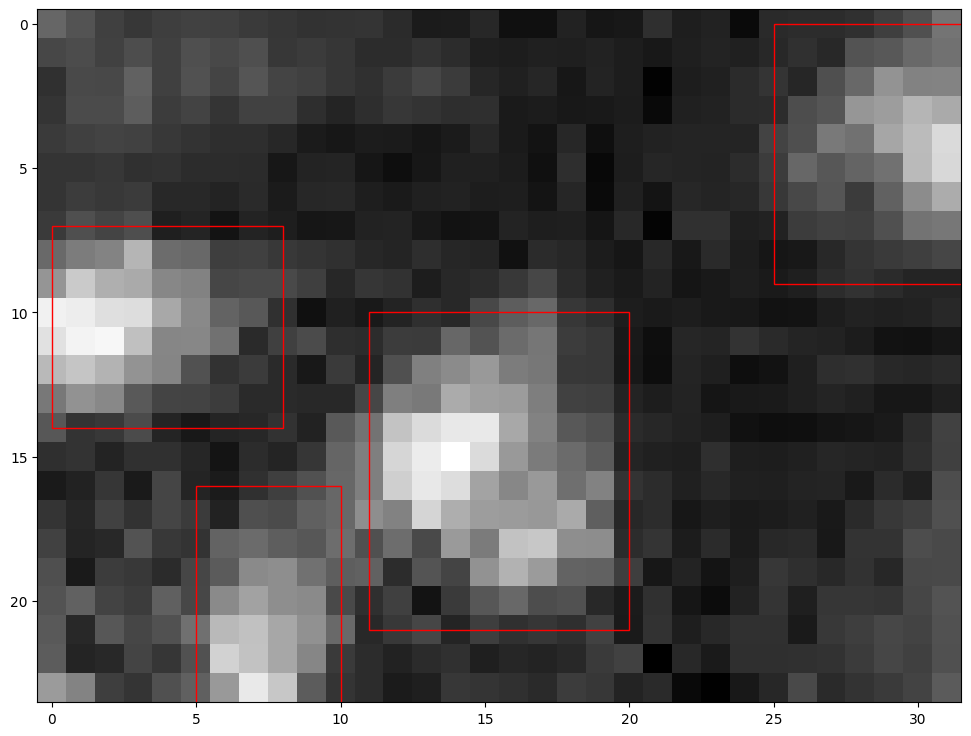

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_boxes_on_image(image, normalized_coords, width=32, height=24):

    # Remove the first dimension from normalized_coords
    normalized_coords = normalized_coords.squeeze()

    # Denormalize the coordinates
    denormalized_coords = normalized_coords * [width, height, width, height, width, height, width, height]

    if image.ndim == 4:
        image = image[0]

    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 9))
    
    # Display the image
    ax.imshow(image[:, :, 0], cmap='gray')

    # Loop over each set of coordinates and draw the bounding box
    for coord in denormalized_coords:
        # Extract coordinates for the bounding box
        top_left_x, top_left_y, top_right_x, top_right_y, bottom_right_x, bottom_right_y, bottom_left_x, bottom_left_y = coord
        
        # Create a rectangle patch using top left and bottom right coordinates
        rect = patches.Rectangle((top_left_x, top_left_y), bottom_right_x - top_left_x, bottom_right_y - top_left_y, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the axis
        ax.add_patch(rect)

    plt.show()


draw_boxes_on_image(origin_images[1000:1001], norm_location[1000:1001])
